# Importing libraries

In [999]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [1000]:
# Importing dataset
df = pd.read_csv("Titanic dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<h1 style="color: purple;">Data Preprocessing</h1>

### Shape of the dataset

In [1001]:
df.shape

(418, 12)

### Information regarding dataset

In [1002]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Checking duplicate values

In [1003]:
# Is there any duplicate value in dataset?
df.duplicated().sum()

0

### Dropping unneccessary columns

In [1004]:
# Dropping columns which are not of use in analysis and modelling
columns_to_drop = ['PassengerId', 'Name','Ticket', 'Fare','Cabin']
df = df.drop(columns=columns_to_drop)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


## Handling missing values

In [1005]:
# Null values in dataset?
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [1006]:
# Checking the percentage of data missing in each column
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Embarked     0.000000
dtype: float64

In [1007]:
# Here, I defined a custom function fill_random(row, mean, std) that takes a row, mean, and standard deviation as inputs. 
# Inside this function, if the value in the row is missing (NaN), it fills it with a random value generated from a 
# normal distribution with the specified mean and standard deviation. If the value is not missing, it leaves it unchanged.

# Defining a function to generate random values for missing data
def fill_random(row, mean, std):
    if pd.isna(row):
        return np.random.normal(mean, std)
    else:
        return row

In [1008]:
# Defining mean and standard deviation for random value
mean_age = df['Age'].mean()
std_age = df['Age'].std()

# Applying the function to create new columns filling missing values with random values
df['Age_random'] = df['Age'].apply(lambda x: fill_random(x, mean_age, std_age))

In [1009]:
# Calculate the mean age from the 'Age' column
mean_age = df['Age'].mean()

# Fill missing values in the 'Age' column with the mean age and create a new column 'Age_mean'
df['Age_mean'] = df['Age'].fillna(mean_age)

In [1010]:
# Calculate the median age from the 'Age' column
median_age = df['Age'].median()

# Fill missing values in the 'Age' column with the median age and create a new column 'Age_median'
df['Age_median'] = df['Age'].fillna(median_age)

In [1011]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_random,Age_mean,Age_median
38,0,3,male,25.0,0,0,S,25.000000,25.00000,25.0
400,1,1,female,30.0,0,0,S,30.000000,30.00000,30.0
277,0,2,male,40.0,1,0,S,40.000000,40.00000,40.0
43,1,2,female,30.0,0,0,S,30.000000,30.00000,30.0
170,0,3,male,NaN,0,0,S,17.829803,30.27259,27.0


In [1012]:
# When using mean, median or random value to replace missing values in a dataset, this can impact downstream analyses or modeling.
# For that, we are calculating the variance. We check whether the variance of the imputed datasets has significantly  
# changed as compared to the original dataset.

print("Original Age variable variance : ", df['Age'].var())
print("Age variance after imputating random value : ", df['Age_random'].var())
print("Age variance after imputating mean value : ", df['Age_mean'].var())
print("Age variance after imputating median value : ", df['Age_median'].var())

Original Age variable variance :  201.10669538455937
Age variance after imputating random value :  197.29704424027207
Age variance after imputating mean value :  159.63145365057315
Age variance after imputating median value :  161.38576830860688


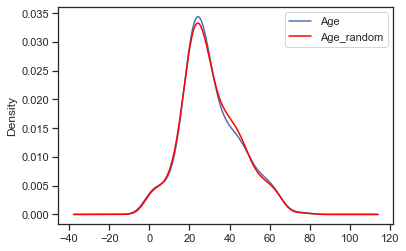

In [1013]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_random' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)

# variable imputed with random value
df['Age_random'].plot(kind='kde', ax=ax, color='red')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

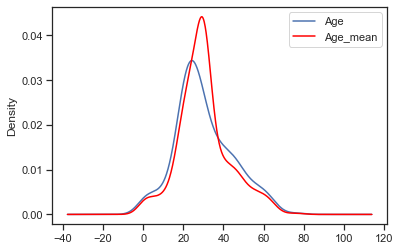

In [1014]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_mean' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)


# variable imputed with mean value
df['Age_mean'].plot(kind='kde', ax=ax, color='red')


# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

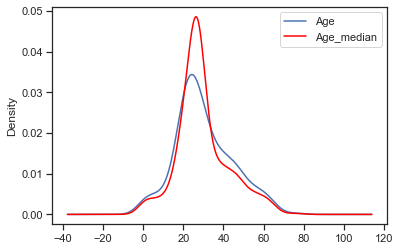

In [1015]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_median' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)


# variable imputed with median value
df['Age_median'].plot(kind='kde', ax=ax, color='red')


# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [1016]:
# Dropping specified columns from the DataFrame
columns_to_drop = ['Age', 'Age_mean', 'Age_median']
df = df.drop(columns=columns_to_drop)

df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_random
0,0,3,male,0,0,Q,34.5
1,1,3,female,1,0,S,47.0
2,0,2,male,0,0,Q,62.0


In [1017]:
# Renaming the 'Age_random' column to 'Age' in the DataFrame
df.rename(columns={'Age_random': 'Age'}, inplace=True)

df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,0,0,Q,34.5
1,1,3,female,1,0,S,47.0
2,0,2,male,0,0,Q,62.0


In [1018]:
# Converting the 'Age' column to integers in the DataFrame
df['Age'] = df['Age'].astype('int')

# Displaying the first 3 rows of the DataFrame after the data type conversion
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,0,0,Q,34
1,1,3,female,1,0,S,47
2,0,2,male,0,0,Q,62


### Concatenating columns

In [1019]:
# Calculating the total number of family members by adding 'SibSp' (siblings/spouses) and 'Parch' (parents/children) columns
df['FamilyMembers'] = df['SibSp'] + df['Parch']

# Displaying a random sample of 5 rows from the DataFrame with the new 'FamilyMembers' column
df.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,FamilyMembers
114,1,1,female,1,0,S,63,1
250,1,2,female,1,2,S,0,3
327,0,1,male,0,0,C,46,0
122,1,1,female,1,0,C,35,1
209,0,3,male,0,0,S,25,0


In [1020]:
# Dropping specified columns from the DataFrame
columns_to_drop = ['SibSp', 'Parch']
df = df.drop(columns=columns_to_drop)

df.head(3)

,Survived,Pclass,Sex,Embarked,Age,FamilyMembers
0,0,3,male,Q,34,0
1,1,3,female,S,47,1
2,0,2,male,Q,62,0


### One Hot Encoding technique

In [1021]:
# Assuming you have a DataFrame called 'df' with 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')


# Displaying the first few rows of the DataFrame with the new dummy variables
df.head()

,Survived,Pclass,Embarked,Age,FamilyMembers,Sex_female,Sex_male
0,0,3,Q,34,0,0,1
1,1,3,S,47,1,1,0
2,0,2,Q,62,0,0,1
3,0,3,S,27,0,0,1
4,1,3,S,22,2,1,0


In [1022]:
# Creating dummy variables for the 'Embarked' column, which is a categorical variable
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Displaying the first few rows of the DataFrame with the new dummy variables
df.head()

,Survived,Pclass,Age,FamilyMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34,0,0,1,0,1,0
1,1,3,47,1,1,0,0,0,1
2,0,2,62,0,0,1,0,1,0
3,0,3,27,0,0,1,0,0,1
4,1,3,22,2,1,0,0,0,1


### Reordering the columns

In [1023]:
# Reorder the columns so that target column 'Survived' is the last column
column_order = [col for col in df.columns if col != 'Survived'] + ['Survived']
df = df[column_order]

df

,Pclass,Age,FamilyMembers,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34,0,0,1,0,1,0,0
1,3,47,1,1,0,0,0,1,1
2,2,62,0,0,1,0,1,0,0
3,3,27,0,0,1,0,0,1,0
4,3,22,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
413,3,40,0,0,1,0,0,1,0
414,1,39,0,1,0,1,0,0,1
415,3,38,0,0,1,0,0,1,0
416,3,27,0,0,1,0,0,1,0


<h1 style="color: purple;">Exploratory Data Analysis</h1>

## *1) Univariate Analysis*

### Pclass - Bar plot

Text(0, 0.5, 'Frequency')

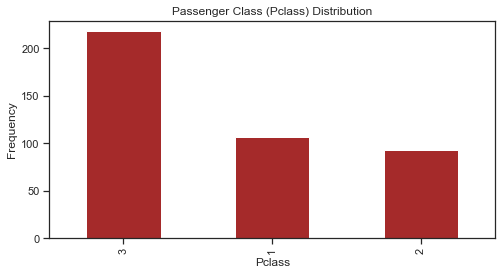

In [1024]:
# Create a figure with a specified size
plt.figure(figsize=(8, 4))

# Value counts of Pclass using bar plot
df['Pclass'].value_counts().plot(kind='bar', color='brown')

plt.title('Passenger Class (Pclass) Distribution')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

### Age - Histogram

Text(0, 0.5, 'Frequency')

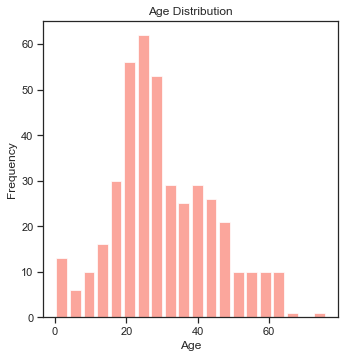

In [1025]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

# Create a subplot in a 2x3 grid and select the second position
plt.subplot(2, 3, 2)

# Plot a histogram of the 'Age' column with specified settings
plt.hist(df['Age'].dropna(), bins=20, rwidth=0.8, color='salmon', alpha=0.7)

# Set the title, x-axis label, and y-axis label for this subplot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Family Members Distribution - Bar plot 

Text(0, 0.5, 'Frequency')

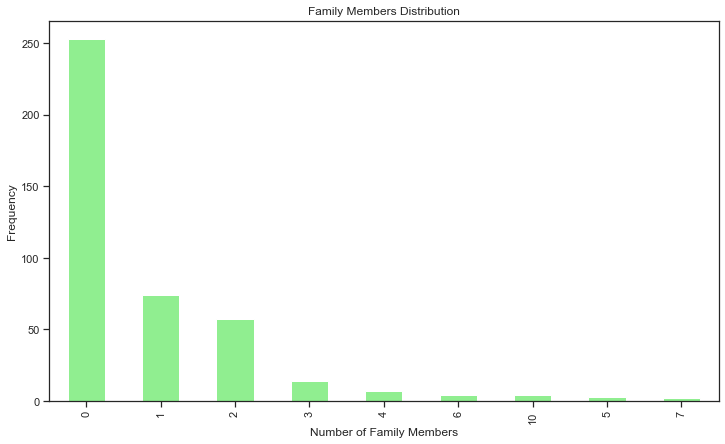

In [1026]:
# Create a figure with a specified size
plt.figure(figsize=(12, 7))

# Value counts of FamilyMembers using bar plot
df['FamilyMembers'].value_counts().plot(kind='bar', color='lightgreen')

# Set the title, x-axis label, and y-axis label
plt.title('Family Members Distribution')
plt.xlabel('Number of Family Members')
plt.ylabel('Frequency')

### Gender Distribution - Bar chart

Text(0, 0.5, 'Count')

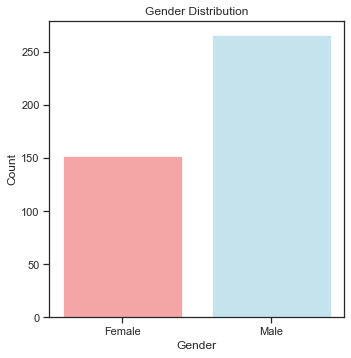

In [1027]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

# Create a subplot in a 2x3 grid and select the fourth position
plt.subplot(2, 3, 4)

# Calculate the counts of females and males
gender_counts = df['Sex_female'].sum(), df['Sex_male'].sum()

# Define labels for the x-axis
genders = ['Female', 'Male']

# Create a bar chart with specified colors and transparency
plt.bar(genders, gender_counts, color=['lightcoral', 'lightblue'], alpha=0.7)

# Set the title, x-axis label, and y-axis label for this subplot
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

### Embarked_C, Embarked_Q, and Embarked_S - Pie Chart

Text(0.5, 1.0, 'Embarkation Port Distribution')

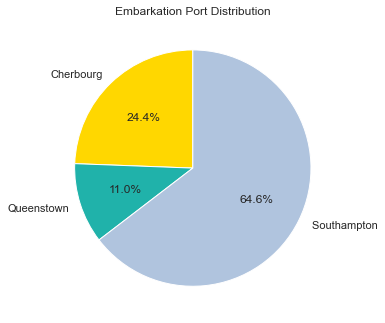

In [1028]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 5)
embarked_counts = [df['Embarked_C'].sum(), df['Embarked_Q'].sum(), df['Embarked_S'].sum()]
labels = ['Cherbourg', 'Queenstown', ' Southampton']
colors = ['gold', 'lightseagreen', 'lightsteelblue']
plt.pie(embarked_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Embarkation Port Distribution')

### Survived - Pie Chart

Text(0.5, 1.0, 'Survival Distribution')

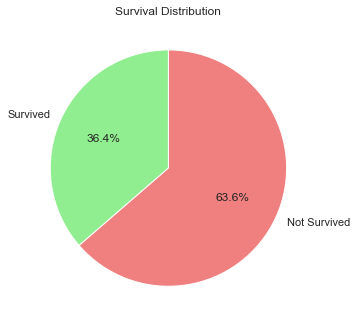

In [1029]:
# Create a figure with a specified size
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 6)
survived_counts = [df['Survived'].sum(), len(df) - df['Survived'].sum()]
labels = ['Survived', 'Not Survived']
colors = ['lightgreen', 'lightcoral']
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')

## *2) Bivariate Analysis*

### Violin Plot : Age vs. Pclass

Text(0, 0.5, 'Age')

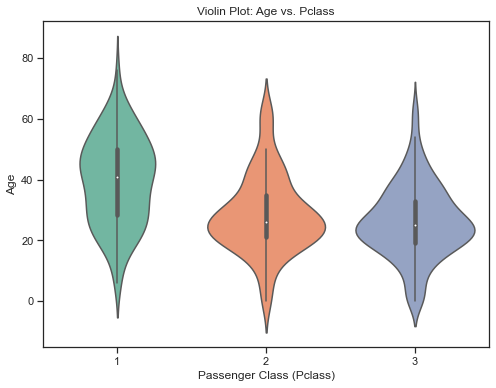

In [1030]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a violin plot using Seaborn
sns.violinplot(x='Pclass', y='Age', data=df, palette='Set2')

# Set the title, x-axis label, and y-axis label
plt.title('Violin Plot: Age vs. Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')

### Heatmap : Pclass vs Survived

Text(0.5, 12.5, 'Survived (0 = No, 1 = Yes)')

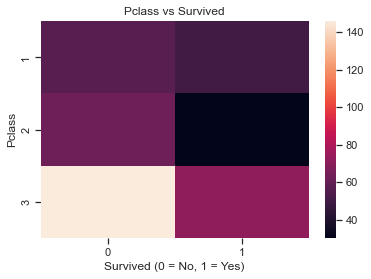

In [1031]:
# Create a heatmap to visualize the cross-tabulation of 'Pclass' and 'Survived'
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']))

# Set the title of the plot
plt.title('Pclass vs Survived')

# Set the x-axis label
plt.xlabel('Survived (0 = No, 1 = Yes)')

### Heatmap : Sex_male vs Survived

Text(0.5, 12.5, 'Survived (0 = No, 1 = Yes)')

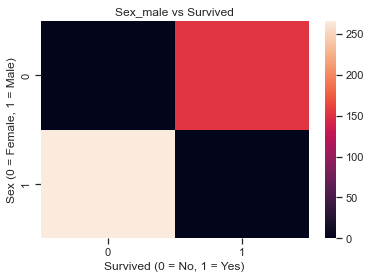

In [1032]:
# Create a heatmap to visualize the cross-tabulation of 'Sex_male' and 'Survived'
sns.heatmap(pd.crosstab(df['Sex_male'], df['Survived']))

# Set the title of the plot
plt.title('Sex_male vs Survived')

# Set the y-axis label
plt.ylabel('Sex (0 = Female, 1 = Male)')

# Set the x-axis label
plt.xlabel('Survived (0 = No, 1 = Yes)')

### Swarm Plot : Age vs Survived

Text(0, 0.5, 'Age')

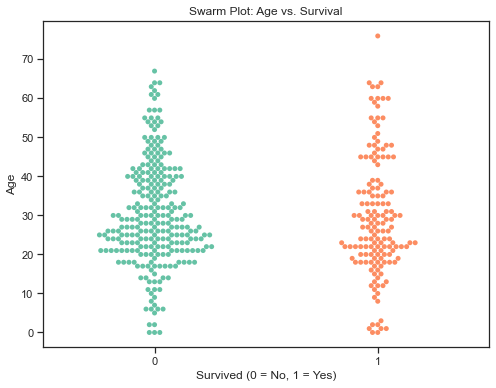

In [1033]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a swarm plot using Seaborn
sns.swarmplot(x='Survived', y='Age', data=df, palette='Set2')

# Set the title, x-axis label, and y-axis label
plt.title('Swarm Plot: Age vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')

## *3) Multivariate Analysis*

### Strip Plot : Pclass vs. Age vs Survival

Text(0, 0.5, 'Age')

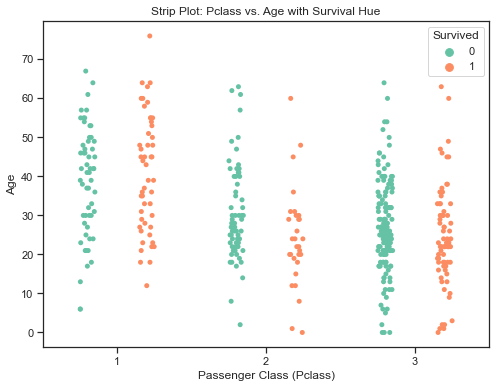

In [1034]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a strip plot with 'Pclass' on the x-axis, 'Age' on the y-axis, and 'Survived' used to distinguish data points
sns.stripplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Set2', dodge=True)

# Set the title, x-axis label, and y-axis label
plt.title('Strip Plot: Pclass vs. Age with Survival Hue')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')

### Correlation Heatmap of Multivariate Relationships

Text(0.5, 1.0, 'Correlation Heatmap of Multivariate Relationships')

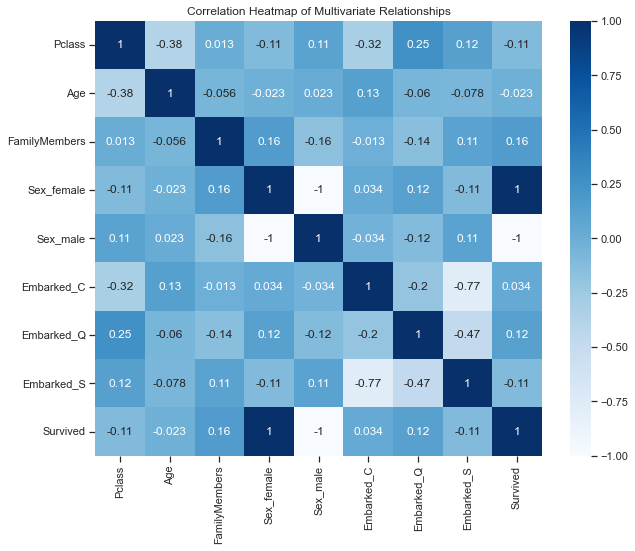

In [1035]:
# Define the subset of columns for correlation analysis
subset_columns = ['Pclass', 'Age', 'FamilyMembers', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']

# Calculate the correlation matrix for the selected columns
corr_matrix = df[subset_columns].corr()

# Create a figure with a specified size
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix, with annotations and a Blue color map
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Set the title of the plot
plt.title('Correlation Heatmap of Multivariate Relationships')

### 3D Scatter Plot : Pclass vs Age vs FamilyMembers vs Survived

Text(0.5, 0.92, '3D Scatter Plot of Multivariate Relationships')

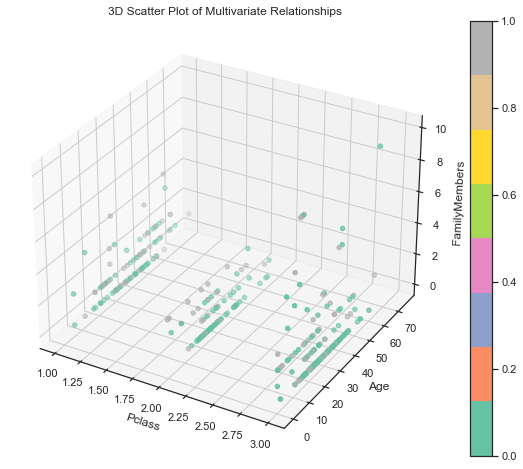

In [1036]:
# Import the necessary libraries
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure with a specified size and add a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the subset of columns for the plot
subset_columns = ['Pclass', 'Age', 'FamilyMembers', 'Survived']

# Extract data for the x, y, z, and color (c) dimensions
x = df['Pclass']
y = df['Age']
z = df['FamilyMembers']
c = df['Survived']

# Create a scatter plot in 3D with specified data and colormap
sc = ax.scatter(x, y, z, c=c, cmap='Set2')

# Add a color bar to the plot
plt.colorbar(sc)

# Set labels for the x, y, and z axes, and set the title of the plot
ax.set_xlabel('Pclass')
ax.set_ylabel('Age')
ax.set_zlabel('FamilyMembers')
ax.set_title('3D Scatter Plot of Multivariate Relationships')

<h1 style="color: purple;">Data Modelling</h1>

## Import necessary libraries

In [1037]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

## Train Test Split

In [1038]:
# Split the data into features (X) and the target variable (y)
selected_columns = ['Pclass', 'Age', 'FamilyMembers', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[selected_columns]
y = df['Survived']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [1039]:
clf = DecisionTreeClassifier(
    max_depth=5,              # Maximum depth of the tree
    criterion='entropy'     # Minimum number of samples required to split an internal node
    )

# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Model Accuracy

In [1040]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy*100)

Accuracy: 100.0


## Making Prediction

In [1041]:
# Define a function to get user input for features
def get_user_input():
    pclass = int(input("Enter Passenger Class (1, 2, 3): "))
    age = float(input("Enter Age: "))
    family_members = int(input("Enter the Number of Family Members: "))
    sex = input("Enter Gender (Male or Female): ").strip().lower()
    embarked = input("Enter Embarked Port (C, Q, S): ").strip().lower()
    
    # Convert sex and embarked to binary features
    sex_female = 1 if sex == 'female' else 0
    sex_male = 1 if sex == 'male' else 0
    embarked_c = 1 if embarked == 'c' else 0
    embarked_q = 1 if embarked == 'q' else 0
    embarked_s = 1 if embarked == 's' else 0
    
    # Create a dictionary with the input data
    user_input = {
        'Pclass': pclass,
        'Age': age,
        'FamilyMembers': family_members,
        'Sex_female': sex_female,
        'Sex_male': sex_male,
        'Embarked_C': embarked_c,
        'Embarked_Q': embarked_q,
        'Embarked_S': embarked_s
    }
    
    return user_input

# Get user input
user_data = get_user_input()

# Predict whether the passenger survived or not
prediction = clf.predict([list(user_data.values())])
print("\n")

# Display the prediction
if prediction[0] == 1:
    print("The passenger is predicted to have survived.")
else:
    print("The passenger is predicted to have not survived.")

Enter Passenger Class (1, 2, 3): 3
Enter Age: 25
Enter the Number of Family Members: 0
Enter Gender (Male or Female): Male
Enter Embarked Port (C, Q, S): Q


The passenger is predicted to have not survived.


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
